In [2]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

import sys
import os

import warnings

from tensorflow import keras
import numpy as np
from tensorflow.data import Dataset
from image import *
import tensorflow.image

import numpy as np
import json
import cv2
import time



In [12]:

def load_data_list():
    '''
    objective: load lists of data files
    return: lists
    '''
    train_a_list = []
    with open('train_a_list.txt', 'r') as f:
        for line in f:
            inner_list = ['../'+elt.strip() for elt in line.split(',')]
            train_a_list.append(inner_list)
    train_a_list = [val.replace('\'','') for val in train_a_list[0]]

    test_a_list = []
    with open('test_a_list.txt', 'r') as f:
        for line in f:
            inner_list = ['../'+elt.strip() for elt in line.split(',')]
            test_a_list.append(inner_list)
    test_a_list = [val.replace('\'','') for val in test_a_list[0]]

    train_b_list = []
    with open('train_b_list.txt', 'r') as f:
        for line in f:
            inner_list = ['../'+elt.strip() for elt in line.split(',')]
            train_b_list.append(inner_list)
    train_b_list = [val.replace('\'','') for val in train_b_list[0]]

    test_b_list = []
    with open('test_b_list.txt', 'r') as f:
        for line in f:
            inner_list = ['../'+elt.strip() for elt in line.split(',')]
            test_b_list.append(inner_list)
    test_b_list = [val.replace('\'','') for val in test_b_list[0]]


    return train_a_list, test_a_list, train_b_list, test_b_list




In [13]:
def load_data(paths, train = True):
    '''
    objective: load image files
    param: paths to each image files
    return: image files of input image and ground-truth image
    '''
    for img_path in paths:
        gt_path = img_path.decode("utf-8").replace('.jpg','.h5').replace('images','ground-truth')
        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels = 3)
        img = tf.cast(img, tf.float32)
        img = (img/127.5) - 1 # normalizing the images to [-1, 1]

        # another option
    	# img = img/255.0
	    # img[:,:,0]=(img[:,:,0]-0.485)/0.229
	    # img[:,:,1]=(img[:,:,1]-0.456)/0.224
	    # img[:,:,2]=(img[:,:,2]-0.406)/0.225

        gt_file = h5py.File(gt_path, 'r')
        target = np.asarray(gt_file['density'])

        target = cv2.resize(target,(int(target.shape[1]/8),int(target.shape[0]/8)),interpolation = cv2.INTER_CUBIC)*64


        yield (img, target)


def load_datasets():
	'''
	objective: load datasets from lists of paths and apply load function
	return: train_dataset, test_dataset - tf.data.Dataset
	'''
	train_a_list, test_a_list, train_b_list, test_b_list = load_data_list()

	# part_A
	# load dataset from generator defined as load_data
	train_a_dataset = tf.data.Dataset.from_generator(
		load_data, args = [train_a_list],output_types = (tf.float32, tf.float32), output_shapes = ((None,None,3), (None,None)))
	train_a_dataset = train_a_dataset.shuffle(100000)

	test_a_dataset = tf.data.Dataset.from_generator(
		load_data, args = [test_a_list], output_types = (tf.float32, tf.float32), output_shapes = ((None,None,3), (None,None)))
	
	# part_B
	train_b_dataset = tf.data.Dataset.from_generator(
		load_data, args = [train_b_list],output_types = (tf.float32, tf.float32), output_shapes = ((None,None,3), (None,None)))
	train_b_dataset = train_b_dataset.shuffle(100000)

	test_b_dataset = tf.data.Dataset.from_generator(
		load_data, args = [test_b_list], output_types = (tf.float32, tf.float32), output_shapes = ((None,None,3), (None,None)))
	

	return train_a_dataset, test_a_dataset, train_b_dataset, test_b_dataset

In [14]:
train_a_dataset, test_a_dataset, train_b_dataset, test_b_dataset = load_datasets()

In [41]:
train_a_gt = []
for i, val in train_a_dataset:
    train_a_gt.append(int(np.sum(val)))

In [42]:
test_a_gt = []
for i, val in test_a_dataset:
    test_a_gt.append(int(np.sum(val)))

In [43]:
train_b_gt = []
for i, val in train_b_dataset:
    train_b_gt.append(int(np.sum(val)))

In [44]:
test_b_gt = []
for i, val in test_b_dataset:
    test_b_gt.append(int(np.sum(val)))

In [45]:
part_a_gt = train_a_gt+test_a_gt

In [46]:
part_b_gt = train_b_gt+test_b_gt

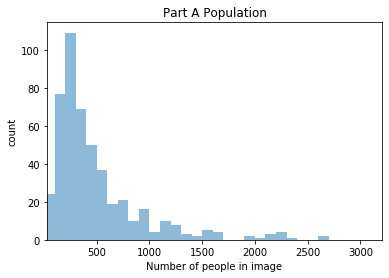

In [53]:
import numpy as np
import random
from matplotlib import pyplot as plt

bins = np.arange(0, 3000, 100) 

plt.xlim([min(part_a_gt), max(part_a_gt)+100])

plt.hist(part_a_gt,bins = bins, alpha=0.5)
plt.title('Part A Population')
plt.xlabel('Number of people in image')
plt.ylabel('count')

plt.show()

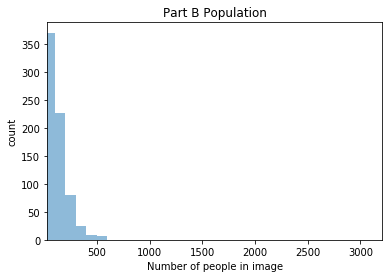

In [52]:

bins = np.arange(0, 3000, 100) 

plt.xlim([min(part_a_gt), max(part_a_gt)+100])

plt.hist(part_b_gt,bins = bins, alpha=0.5)
plt.title('Part B Population')
plt.xlabel('Number of people in image')
plt.ylabel('count')

plt.show()